In [1]:
import pandas as pd
import json
from IPython.core.display import HTML

In [2]:
def books_json_to_dataframe(yr):
    import os
    main_dir = os.path.dirname(os.path.dirname(os.getcwd()))

    with open(main_dir + '\\' + yr + '\\notebook_version\\book_data.json') as f:
      books_data = json.load(f)
    
    df_ = pd.DataFrame(data=books_data['books'])
    
    return df_

In [3]:
df_books = books_json_to_dataframe('2022')

In [4]:
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="240" >'


In [5]:
df_books

,title,author,cover,pages,main_genre,sub_genre
0,Darth Plagueis,James Luceno,https://images-na.ssl-images-amazon.com/images...,498,Fiction,Science Fiction
1,Dooku: Jedi Lost,Cavan Scott,https://images-na.ssl-images-amazon.com/images...,480,Fiction,Science Fiction
2,Fahrenheit 451,Ray Bradbury,https://images-na.ssl-images-amazon.com/images...,249,Fiction,Science Fiction
3,Master and Apprentice,Claudia Gray,https://images-na.ssl-images-amazon.com/images...,480,Fiction,Science Fiction
4,The Strain,"Guillermo Del Toro, Chuck Hogan",https://images-na.ssl-images-amazon.com/images...,432,Fiction,Horror
5,The Fall,"Guillermo Del Toro, Chuck Hogan",https://images-na.ssl-images-amazon.com/images...,480,Fiction,Horror
6,The Night Eternal,"Guillermo Del Toro, Chuck Hogan",https://images-na.ssl-images-amazon.com/images...,560,Fiction,Horror
7,Zen and the Art of Motorcycle Maintenance,Robert M. Pirsig,https://images-na.ssl-images-amazon.com/images...,464,Fiction,Philosophy
8,Parasite Rex,Carl Zimmer,https://images-na.ssl-images-amazon.com/images...,320,Non-Fiction,Science
9,Kenobi,John Jackson Miller,https://images-na.ssl-images-amazon.com/images...,464,Fiction,Science Fiction


In [6]:
# let's change the layout before moving on

df_books = df_books[['cover','title','author','pages','main_genre','sub_genre']]

In [7]:
# Rendering the images in the dataframe using the HTML method with formatters

HTML(df_books.to_html(escape=False,formatters=dict(cover=path_to_image_html)))

,cover,title,author,pages,main_genre,sub_genre
0,,Darth Plagueis,James Luceno,498,Fiction,Science Fiction
1,,Dooku: Jedi Lost,Cavan Scott,480,Fiction,Science Fiction
2,,Fahrenheit 451,Ray Bradbury,249,Fiction,Science Fiction
3,,Master and Apprentice,Claudia Gray,480,Fiction,Science Fiction
4,,The Strain,"Guillermo Del Toro, Chuck Hogan",432,Fiction,Horror
5,,The Fall,"Guillermo Del Toro, Chuck Hogan",480,Fiction,Horror
6,,The Night Eternal,"Guillermo Del Toro, Chuck Hogan",560,Fiction,Horror
7,,Zen and the Art of Motorcycle Maintenance,Robert M. Pirsig,464,Fiction,Philosophy
8,,Parasite Rex,Carl Zimmer,320,Non-Fiction,Science
9,,Kenobi,John Jackson Miller,464,Fiction,Science Fiction


In [8]:
# you can also not use formatters but create the html in the field itself
# the cover image sizes differ so I prefer setting a defined image size like above
# I am chosing not to run this cell since it takes up a lot of space with the huge cover image sizes. =]
# df_books_alt = df_books.copy()
# df_books_alt['cover'] = '<img src="'+ df_books_alt['cover'] + '">'
# HTML(df_books_alt.to_html(escape=False))

## Filtering

In [8]:
# if we wanted to filter our list of books on certain criteria we can simply do this:

df_books[df_books['main_genre'] == 'Fiction']

,cover,title,author,pages,main_genre,sub_genre
0,https://images-na.ssl-images-amazon.com/images...,Darth Plagueis,James Luceno,498,Fiction,Science Fiction
1,https://images-na.ssl-images-amazon.com/images...,Dooku: Jedi Lost,Cavan Scott,480,Fiction,Science Fiction
2,https://images-na.ssl-images-amazon.com/images...,Fahrenheit 451,Ray Bradbury,249,Fiction,Science Fiction
3,https://images-na.ssl-images-amazon.com/images...,Master and Apprentice,Claudia Gray,480,Fiction,Science Fiction
4,https://images-na.ssl-images-amazon.com/images...,The Strain,"Guillermo Del Toro, Chuck Hogan",432,Fiction,Horror
5,https://images-na.ssl-images-amazon.com/images...,The Fall,"Guillermo Del Toro, Chuck Hogan",480,Fiction,Horror
6,https://images-na.ssl-images-amazon.com/images...,The Night Eternal,"Guillermo Del Toro, Chuck Hogan",560,Fiction,Horror
7,https://images-na.ssl-images-amazon.com/images...,Zen and the Art of Motorcycle Maintenance,Robert M. Pirsig,464,Fiction,Philosophy
9,https://images-na.ssl-images-amazon.com/images...,Kenobi,John Jackson Miller,464,Fiction,Science Fiction
10,https://images-na.ssl-images-amazon.com/images...,Solaris,Stanislaw Lem,224,Fiction,Science Fiction


In [9]:
# however, we can make filtering more fun and interactive by using WIDGETS

import ipywidgets as widgets
from IPython.display import display

In [10]:
ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [11]:
def dropdown_main_genre_eventhandler(change):
    output_main_genre.clear_output()
    with output_main_genre:
        if (change.new == ALL):
            display(df_books)
        else:
            display(df_books[df_books.main_genre == change.new])        
        
dropdown_main_genre = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_books.main_genre))

output_main_genre = widgets.Output()

dropdown_main_genre.observe(dropdown_main_genre_eventhandler, names='value')


def dropdown_sub_genre_eventhandler(change):
    output_sub_genre.clear_output()
    with output_sub_genre:
        if (change.new == ALL):
            display(df_books)
        else:
            display(df_books[df_books.sub_genre == change.new])        
        
dropdown_sub_genre = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_books.sub_genre))

output_sub_genre = widgets.Output()

dropdown_sub_genre.observe(dropdown_sub_genre_eventhandler, names='value')



def dropdown_author_eventhandler(change):
    output_author.clear_output()
    with output_author:
        if (change.new == ALL):
            display(df_books)
        else:
            display(df_books[df_books.author == change.new])        
        
dropdown_author = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_books.author))

output_author = widgets.Output()

dropdown_author.observe(dropdown_author_eventhandler, names='value')



In [12]:
display(dropdown_main_genre)

Dropdown(options=('ALL', 'Fiction', 'Non-Fiction'), value='ALL')

In [13]:
display(output_main_genre)

Output()

In [14]:
display(dropdown_sub_genre)

Dropdown(options=('ALL', 'Horror', 'Philosophy', 'Science', 'Science Fiction'), value='ALL')

In [15]:
display(output_sub_genre)

Output()

In [16]:
display(dropdown_author)

Dropdown(options=('ALL', 'Carl Zimmer', 'Cavan Scott', 'Claudia Gray', 'Guillermo Del Toro, Chuck Hogan', 'Jam…

In [17]:
display(output_author)

Output()

## Stats

In [18]:
total_books = df_books['title'].count()
total_pages = df_books['pages'].sum()
print('2022: \nTotal Books Read : ' + str(total_books) + ' \nTotal Pages Read: ' + str(total_pages))


2022: 
Total Books Read : 12 
Total Pages Read: 5131


In [19]:
# let's make a dataframe that contains all the different yearly 'books i have read' datasets so we can compare stuffs. =]


def create_book_stats_dataframe():
    book_stats = []
    
    df_books_2019 = books_json_to_dataframe('2019')
    df_books_2020 = books_json_to_dataframe('2020')
    df_books_2021 = books_json_to_dataframe('2021')
    df_books_2022 = books_json_to_dataframe('2022')
    
    
    book_stats.append([2019, df_books_2019['title'].count(), df_books_2019['pages'].sum()])
    book_stats.append([2020, df_books_2020['title'].count(), df_books_2020['pages'].sum()])
    book_stats.append([2021, df_books_2021['title'].count(), df_books_2021['pages'].sum()])
    book_stats.append([2022, df_books_2022['title'].count(), df_books_2022['pages'].sum()])
    
    df_book_stats_ = pd.DataFrame(data=book_stats, columns=['year','total_books','total_pages'])
    
    return df_book_stats_

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_book_stats = create_book_stats_dataframe()

In [22]:
df_book_stats

,year,total_books,total_pages
0,2019,22,6719
1,2020,24,9801
2,2021,33,13780
3,2022,12,5131


In [23]:
def create_basic_barplot(df, x_value, y_value, title, x_label, y_label):
    plt.subplots(figsize=(15, 6))
    chart = sns.barplot(x=x_value, y=y_value, data=df, palette=sns.color_palette("Set1", n_colors=8, desat=.5))
    chart.axhline(df[y_value].mean())
    chart = chart.set_title(title, fontsize = 18)
    chart = plt.xlabel(x_label, fontsize = 12)
    chart = plt.ylabel(y_label, fontsize = 12)
    # chart = plt.ylim(0, df[y_value].max())

    return

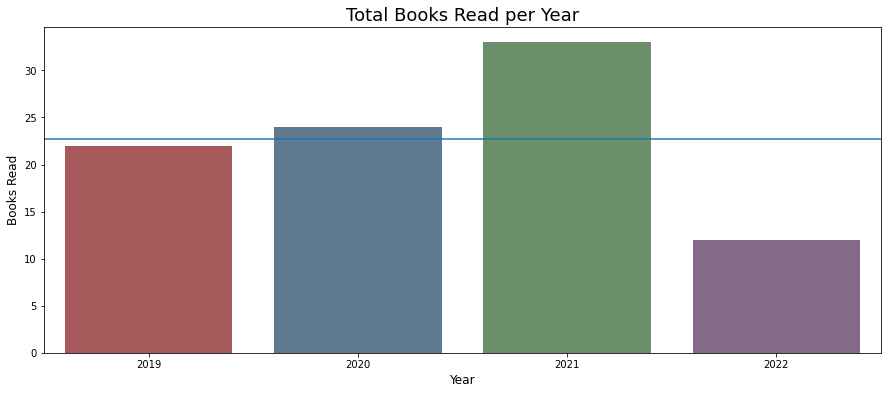

In [24]:
create_basic_barplot(df_book_stats[['year','total_books']],'year','total_books','Total Books Read per Year','Year','Books Read')

In [25]:
# let's get an author count
df_authors = pd.DataFrame({'total' : df_books.groupby(['author'])['author'].count()}).reset_index()
df_authors.sort_values(by='total', ascending=False, inplace=True)

In [26]:
df_authors

,author,total
3,"Guillermo Del Toro, Chuck Hogan",3
0,Carl Zimmer,1
1,Cavan Scott,1
2,Claudia Gray,1
4,James Luceno,1
5,John Jackson Miller,1
6,Matthew Stover,1
7,Ray Bradbury,1
8,Robert M. Pirsig,1
9,Stanislaw Lem,1


In [27]:
# top 3 authors
df_authors[:3]

,author,total
3,"Guillermo Del Toro, Chuck Hogan",3
0,Carl Zimmer,1
1,Cavan Scott,1


In [28]:
# we can also look at timeline, era, storyline

# let's get an author count
df_sub_genres = pd.DataFrame({'total' : df_books.groupby(['sub_genre'])['sub_genre'].count()}).reset_index()
df_sub_genres.sort_values(by='total', ascending=False, inplace=True)

df_main_genres = pd.DataFrame({'total' : df_books.groupby(['main_genre'])['main_genre'].count()}).reset_index()
df_main_genres.sort_values(by='total', ascending=False, inplace=True)

In [29]:
df_main_genres

,main_genre,total
0,Fiction,11
1,Non-Fiction,1


In [30]:
df_sub_genres

,sub_genre,total
3,Science Fiction,7
0,Horror,3
1,Philosophy,1
2,Science,1


In [31]:
# to render the dataframe as an html table
#df_books.to_html(escape=False, formatters=dict(cover=path_to_image_html))

# Saving the dataframe as a webpage
df_books.to_html('books_i_have_read_2022.html',escape=False, formatters=dict(cover=path_to_image_html))